<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Logo_exactas.svg/800px-Logo_exactas.svg.png" alt="Logo Exactas UBA" style="width:100px;">
<img src="
https://ic.fcen.uba.ar/images/logo.png" alt="Logo Instituto de Cálculo" style="width:100px;">

# **TP 1: SUBE-2023** 



### Participantes: Joaquín Koifman y Tobías Palacín Roitbarg

## Procesamiento de datos

In [1]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geopandas as gpd
import json
import plotly.express as px

In [2]:
# Leer dataset y ver las primeras filas
datos_sube_2023 = pd.read_csv("sube-2023.csv")
datos_sube_2023.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO


#### **1. a)** Transformar la columna `DIA_TRANSPORTE` para que sea reconocida como una fecha.

In [3]:
sube_2023=datos_sube_2023.rename(columns={"DIA_TRANSPORTE" : "FECHA"}) # Renombrar la columna por comodidad
sube_2023['FECHA'] = pd.to_datetime(sube_2023['FECHA']) # Aplicar el cambio del tipo de dato sobre la columna correspondiente con la librería datetime
sube_2023['FECHA'].dtype # Corroboramos por consola que se trata del tipo M8, que es otra forma de llamarle al tipo datetime64

dtype('<M8[ns]')

#### **b)** Agregar tres columnas al DataFrame:
* `FECHA_DIA`
* `FECHA_ORDINAL`
* `FECHA_MES`

In [4]:
sube_2023["DIA_TRANSPORTE"] = sube_2023["FECHA"].dt.strftime('%a').str[:3]

sube_2023["FECHA_ORDINAL"] = sube_2023["FECHA"].dt.dayofyear

sube_2023["FECHA_MES"] = sube_2023["FECHA"].dt.strftime('%m')

sube_2023.head()


,FECHA,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,DIA_TRANSPORTE,FECHA_ORDINAL,FECHA_MES
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Sun,1,01
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Sun,1,01
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Sun,1,01
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Sun,1,01
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Sun,1,01


#### **2.**  Crear el DataFrame `datos_amba`


In [5]:
datos_amba = sube_2023.loc[(sube_2023["AMBA"] == "SI") & (sube_2023["DATO_PRELIMINAR"]== "NO")] # Filtrar para obtener el DataFrame con las restricciones pedidas
datos_amba = datos_amba[["FECHA","DIA_TRANSPORTE","FECHA_MES","FECHA_ORDINAL","JURISDICCION","LINEA","CANTIDAD","TIPO_TRANSPORTE"]] # Quedarse con las columnas de interés
datos_amba = datos_amba.rename(columns={"CANTIDAD": "pasajeros","DIA_TRANSPORTE":"fecha_dia"}) # Renombrar columnas con nombres más descriptivos
datos_amba.columns = datos_amba.columns.str.lower() # Aplicar .lower() a todas las columnas para que sean iguales a las del DataFrame de salida
datos_amba.head()

,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte
0,2023-01-01,Sun,01,1,MUNICIPAL,1,61,COLECTIVO
1,2023-01-01,Sun,01,1,MUNICIPAL,2B,11,COLECTIVO
3,2023-01-01,Sun,01,1,PROVINCIAL,BS_AS_LINEA_326,438,COLECTIVO
5,2023-01-01,Sun,01,1,MUNICIPAL,BS_AS_LINEA_514,3067,COLECTIVO
6,2023-01-01,Sun,01,1,MUNICIPAL,BS_AS_LINEA_522,332,COLECTIVO


#### **3. a)** Identificar la proporción de la cantidad total anual de pasajeros que le corresponde a cada medio de transporte



In [6]:
pasajeros_por_transporte = datos_amba.groupby("tipo_transporte")["pasajeros"].sum()

total_pasajeros = pasajeros_por_transporte.sum()

proporcion_pasajeros_por_transporte = pasajeros_por_transporte / total_pasajeros

print("Proporción de la cantidad total anual de pasajeros por tipo de transporte:")
print(proporcion_pasajeros_por_transporte)

Proporción de la cantidad total anual de pasajeros por tipo de transporte:
tipo_transporte
COLECTIVO    0.837645
SUBTE        0.068097
TREN         0.094258
Name: pasajeros, dtype: float64


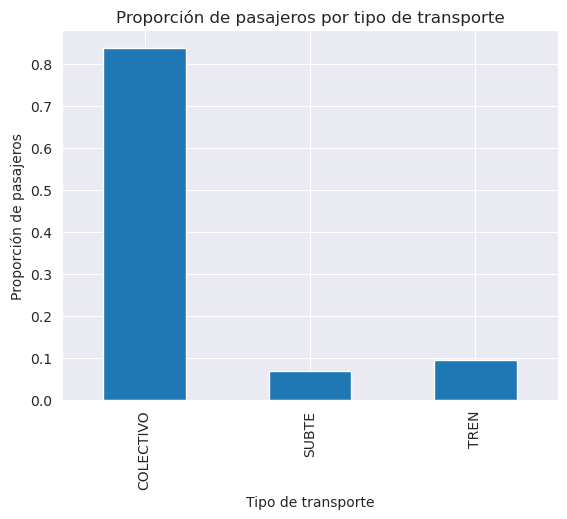

In [17]:
fig, ax = plt.subplots()

sns.set_style("darkgrid") 

proporcion_pasajeros_por_transporte.plot(kind='bar', ax=ax)

ax.set_title('Proporción de pasajeros por tipo de transporte')
ax.set_xlabel('Tipo de transporte')
ax.set_ylabel('Proporción de pasajeros')

plt.show()

**b)** Identificar la tupla `(mes, línea de subte)` donde viajó la mayor cantidad de pasajeros.

In [8]:
datos_subte = datos_amba.loc[datos_amba["tipo_transporte"] == "SUBTE",:]

pasajeros_por_mes_y_linea = datos_subte.groupby(["fecha_mes", "linea"])["pasajeros"].sum()

mayor_cantidad_pasajeros = pasajeros_por_mes_y_linea.idxmax()

print("La tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros es:", mayor_cantidad_pasajeros)

La tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros es: ('08', 'LINEA_B')


**c)** Identificar el día hábil con menos concurrencia en el transporte público.

In [9]:
dias_habiles = datos_amba.loc[(datos_amba["fecha_dia"] != "Sun") & (datos_amba["fecha_dia"] != "Sat"),:]

pasajeros_por_dia = dias_habiles.groupby("fecha_dia")["pasajeros"].std()

dia_con_menor_concurrencia = pasajeros_por_dia.idxmin()

cantidad_de_pasajeros = dias_habiles[dias_habiles["fecha_dia"] == dia_con_menor_concurrencia]["pasajeros"].sum()

print("El día hábil con menos concurencia en el transporte público es", dia_con_menor_concurrencia, "con", cantidad_de_pasajeros, "pasajeros")

El dia habil con menos concurencia en el transporte publico es Mon con 540161948 pasajeros


Text(0, 0.5, 'Cantidad de pasajeros')

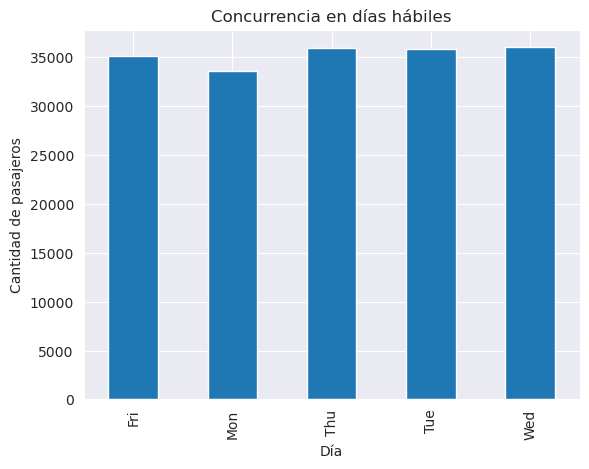

In [19]:
fig, ax = plt.subplots()

pasajeros_por_dia.plot(kind='bar', ax=ax)

ax.set_title('Concurrencia en días hábiles')
ax.set_xlabel('Día')
ax.set_ylabel('Cantidad de pasajeros')

# Análisis Exploratorio

## **4**


/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na 

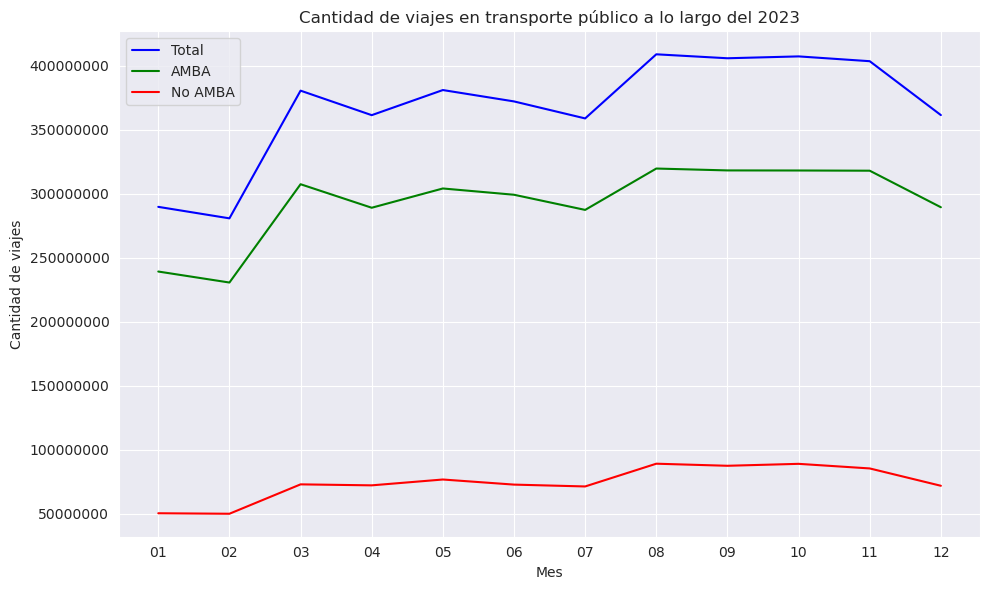

- En promedio, el 80% de todos los viajes que se hicieron en transporte público lo hicieron dentro del AMBA. Solo el 20% restante viajó en otras zonas.
- Se observan caídas pronunciadas en vacaciones de verano e invierno. El mes con menos tráfico es Febrero con una caída de -22%MoM con respecto a Diciembre. 
- El pico de tráfico más alto durante el año fue en el mes de Agosto, donde se registraron 408751702 viajes a lo largo y ancho del país. 


/tmp/ipykernel_6455/811365232.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_6455/811365232.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_6455/811365232.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_6455/811365232.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consi

In [138]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=sube_2023.groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', label='Total', color='blue')

sns.lineplot(data=sube_2023[sube_2023["AMBA"]=="SI"].groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', label='AMBA', color='green')

sns.lineplot(data=sube_2023[sube_2023["AMBA"]=="NO"].groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', label='No AMBA', color='red')

plt.title('Cantidad de viajes en transporte público a lo largo del 2023')
plt.xlabel('Mes')
plt.ylabel('Cantidad de viajes')
plt.legend()

plt.ticklabel_format(style='plain', axis='y')  
plt.tight_layout()
plt.show()
print(f"\033[1;32;40m\033[8;10;20m- En promedio, el {round(sube_2023.loc[sube_2023['AMBA']=='SI',:].groupby('FECHA_MES')['CANTIDAD'].sum().mean()*100/sube_2023.groupby('FECHA_MES')['CANTIDAD'].sum().mean())}% de todos los viajes que se hicieron en transporte público lo hicieron dentro del AMBA. Solo el 20% restante viajó en otras zonas.\n- Se observan caídas pronunciadas en vacaciones de verano e invierno. El mes con menos tráfico es Febrero con una caída de -{round((sube_2023.groupby('FECHA_MES')['CANTIDAD'].sum()[11]-sube_2023.groupby('FECHA_MES')['CANTIDAD'].sum()[1])*100/sube_2023.groupby('FECHA_MES')['CANTIDAD'].sum()[11])}%MoM con respecto a Diciembre. \n- El pico de tráfico más alto durante el año fue en el mes de Agosto, donde se registraron {round(sube_2023.groupby('FECHA_MES')['CANTIDAD'].sum()[7])} viajes a lo largo y ancho del país.\033[0m ")


/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na 

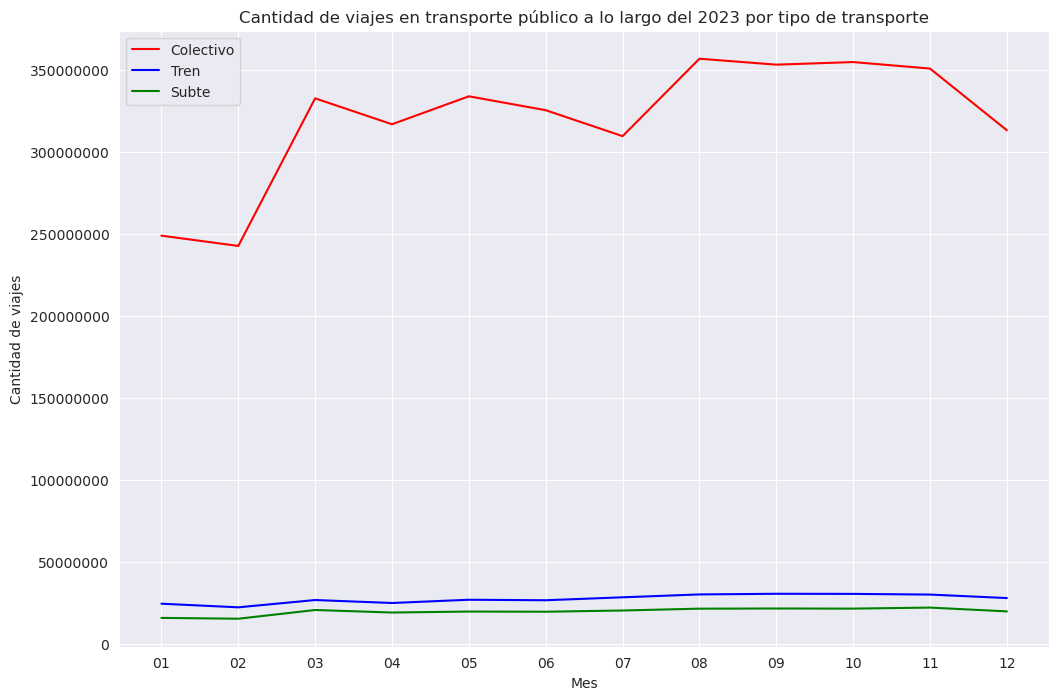

- El colectivo es el medio de transporte más usado, +1056% que el segundo (tren).


In [139]:
plt.figure(figsize=(12, 8))

sns.lineplot(data=sube_2023[sube_2023['TIPO_TRANSPORTE'] == 'COLECTIVO'].groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', color='red', label='Colectivo')
sns.lineplot(data=sube_2023[sube_2023['TIPO_TRANSPORTE'] == 'TREN'].groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', color='blue', label='Tren')
sns.lineplot(data=sube_2023[sube_2023['TIPO_TRANSPORTE'] == 'SUBTE'].groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', color='green', label='Subte')

plt.title('Cantidad de viajes en transporte público a lo largo del 2023 por tipo de transporte')
plt.legend()
plt.xlabel('Mes')
plt.ylabel('Cantidad de viajes')
plt.ticklabel_format(style='plain', axis='y')  
plt.show()

print(f"\033[1;32;40m\033[8;10;20m- El colectivo es el medio de transporte más usado, +{round((sube_2023.loc[sube_2023['TIPO_TRANSPORTE']=='COLECTIVO',:].groupby('FECHA_MES')['CANTIDAD'].sum().mean()-sube_2023.loc[sube_2023['TIPO_TRANSPORTE']=='TREN',:].groupby('FECHA_MES')['CANTIDAD'].sum().mean())*100/sube_2023.loc[sube_2023['TIPO_TRANSPORTE']=='TREN',:].groupby('FECHA_MES')['CANTIDAD'].sum().mean())}% que el segundo (tren).")

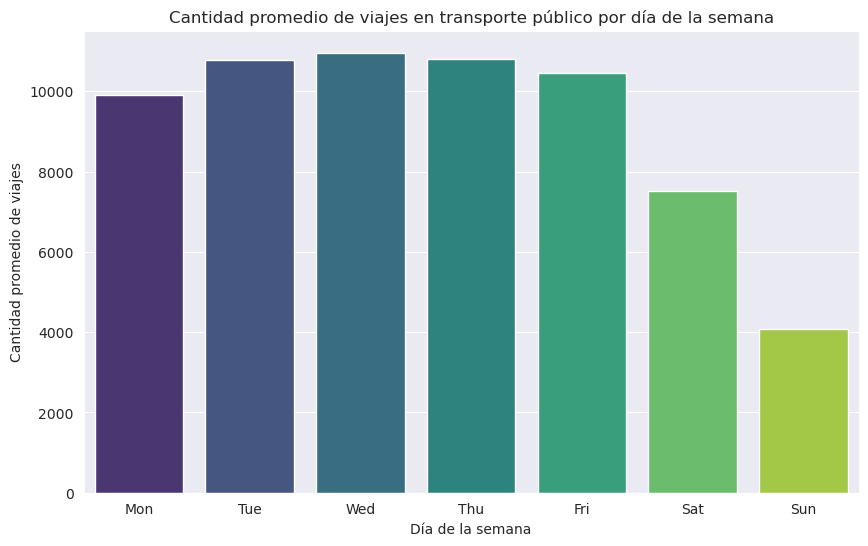

- El día en el que más personas utilizan el transporte público es el miércoles, con 10959 viajes en promedio, mientras que el domingo es el día que menos usuarios utilizan el transporte, con un promedio de 4075


In [137]:
plt.figure(figsize=(10, 6))

sns.barplot(data=sube_2023.groupby("DIA_TRANSPORTE")["CANTIDAD"].mean().reset_index(), x='DIA_TRANSPORTE', y='CANTIDAD',order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], palette='viridis')
plt.title('Cantidad promedio de viajes en transporte público por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad promedio de viajes')
plt.ticklabel_format(style='plain', axis='y')  
plt.show()

print(f"\033[1;32;40m\033[8;10;20m- El día en el que más personas utilizan el transporte público es el miércoles, con {round(sube_2023.loc[sube_2023['DIA_TRANSPORTE'] == 'Wed', :].groupby('DIA_TRANSPORTE')['CANTIDAD'].mean().mean())} viajes en promedio, mientras que el domingo es el día que menos usuarios utilizan el transporte, con un promedio de {round(sube_2023.loc[sube_2023['DIA_TRANSPORTE'] == 'Sun', :].groupby('DIA_TRANSPORTE')['CANTIDAD'].mean().mean())}")


In [141]:
with open ("./ProvinciasArgentina.geojson") as f:
    data = json.load(f)

data_mapa = sube_2023.loc[sube_2023['AMBA'] == 'NO',:]
data_mapa["PROVINCIA"]=data_mapa["PROVINCIA"].replace({
    'SANTIAGO DEL ESTERO': 'Santiago del Estero',
    'TIERRA DEL FUEGO': 'Tierra del Fuego',
    'CAPITAL FEDERAL': 'Capital Federal',
    'BUENOS AIRES': 'Buenos Aires',
    'JN': 'Jujuy',  
    'CHUBUT': 'Chubut',
    'SANTA FE': 'Santa Fe',
    'ENTRE RÍOS': 'Entre Ríos',
    'LA PAMPA': 'La Pampa',
    'MENDOZA': 'Mendoza',
    'RÍO NEGRO': 'Río Negro',
    'CHACO': 'Chaco',
    'NEUQUÉN': 'Neuquén',
    'FORMOSA': 'Formosa',
    'CORRIENTES': 'Corrientes',
    'CATAMARCA': 'Catamarca',
    'SAN JUAN': 'San Juan',
    'SAN LUIS': 'San Luis',
    'CORDOBA': 'Córdoba',
    'SANTA CRUZ': 'Santa Cruz'
})

fig = px.choropleth_mapbox(data_mapa.groupby(['PROVINCIA'])['CANTIDAD'].sum().reset_index(), geojson=data,featureidkey='properties.nombre', locations='PROVINCIA', color='CANTIDAD',
                           color_continuous_scale="Viridis",
                           range_color=(1000000, 137000000),
                           mapbox_style= "open-street-map" ,
                           zoom=3, center = {"lat": -38.40, "lon": -63.60},
                           opacity=0.3,
                           title='Mapa de tráfico de pasajeros fuera de AMBA'
                          )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

print(f"\033[1;32;40m\033[8;10;20m- Si desearamos considerar el AMBA, la provincia entera de Buenos Aires sería la que mayor tráfico tiene por mucha diferencia, ya que manejaría un número por encima de los 1.7 billones de viajes al año. Sin embargo, al exlcuir el AMBA, podemos ver que la provincia con mayor tráfico de personas es Mendoza, con 218M viajes anuales, seguido por Santa Fe, con 130M.\n - A diferencia de lo que uno creería, la provincia de Córdoba está junto con Santiago del Estero entre las que menos usuarios de transporte tienen, con 36k y 118k viajes anuales respectivamente.")


/tmp/ipykernel_6455/2626541004.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



- Si desearamos considerar el AMBA, la provincia entera de Buenos Aires sería la que mayor tráfico tiene por mucha diferencia, ya que manejaría un número por encima de los 1.7 billones de viajes al año. Sin embargo, al exlcuir el AMBA, podemos ver que la provincia con mayor tráfico de personas es Mendoza, con 218M viajes anuales, seguido por Santa Fe, con 130M.
 - A diferencia de lo que uno creería, la provincia de Córdoba está junto con Santiago del Estero entre las que menos usuarios de transporte tienen, con 36k y 118k viajes anuales respectivamente.


In [96]:
datos_filtrados = sube_2023[(sube_2023['TIPO_TRANSPORTE'] == 'COLECTIVO') & (sube_2023['AMBA'] == 'NO') & (sube_2023['PROVINCIA'] != 'BUENOS AIRES')&(sube_2023['PROVINCIA'] != 'Buenos Aires')]

pasajeros_por_provincia = datos_filtrados.groupby('PROVINCIA')['CANTIDAD'].sum().reset_index()

fig = px.pie(pasajeros_por_provincia, values='CANTIDAD', names='PROVINCIA',
             title='Proporción de Pasajeros por Provincia (Colectivos fuera de AMBA y Buenos Aires)',
             labels={'CANTIDAD': 'Cantidad de Pasajeros'})

fig.show()

# Modelado

## 5

#### **5. a)** Generar un DataFrame en el que las columnas sean las líneas de colectivo de AMBA de jurisdicción nacional y las observaciones sean los días del año.

In [85]:
datos_AMBA = pd.read_csv('sube-2023-regresion.csv')

In [87]:
datos_ColectivoJN = datos_AMBA[(datos_AMBA["TIPO_TRANSPORTE"] == "COLECTIVO") & (datos_AMBA['AMBA'] == 'SI') & (datos_AMBA["PROVINCIA"] == "JN") & (datos_AMBA['DATO_PRELIMINAR'] == 'NO')] # filtro y excluyo los datos

cols = datos_ColectivoJN["LINEA"].unique() #busco toda las lineas (sin repetidos)

pasajeros_por_linea = pd.DataFrame()

pasajeros_por_linea = datos_ColectivoJN.pivot_table(index='DIA_TRANSPORTE', columns='LINEA', values='CANTIDAD').fillna(0)

print(pasajeros_por_linea.head())



LINEA           BSAS_LINEA_002  BSAS_LINEA_009  BSAS_LINEA_010  \
DIA_TRANSPORTE                                                   
2023-01-01              5670.0          5644.0          5177.0   
2023-01-02             21759.0         23284.0         21176.0   
2023-01-04             24755.0         25405.0         23806.0   
2023-01-05             25772.0         26489.0         24688.0   
2023-01-06             26021.0         26458.0         24167.0   

LINEA           BSAS_LINEA_015  BSAS_LINEA_017  BSAS_LINEA_019  \
DIA_TRANSPORTE                                                   
2023-01-01              9109.0          7013.0          1604.0   
2023-01-02             45269.0         29962.0         13921.0   
2023-01-04             52873.0         33659.0         16172.0   
2023-01-05             53436.0         35182.0         16569.0   
2023-01-06             53163.0         35212.0         16459.0   

LINEA           BSAS_LINEA_020  BSAS_LINEA_021  BSAS_LINEA_022  \
DIA_TRAN

#### **5. b)** Eliminar las columnas correspondientes a líneas de colectivo que tengan datos faltantes.

In [88]:
pasajeros_por_linea_2023 = pasajeros_por_linea.dropna(axis=1, how = 'any')
pasajeros_por_linea_2023.head()

LINEA,BSAS_LINEA_002,BSAS_LINEA_009,BSAS_LINEA_010,BSAS_LINEA_015,BSAS_LINEA_017,BSAS_LINEA_019,BSAS_LINEA_020,BSAS_LINEA_021,BSAS_LINEA_022,BSAS_LINEA_024,...,LINEA 44,LINEA 5,LINEA 50,LINEA 6,LINEA 7,LINEA 76,LINEA 8,LINEA_099,LINEA_119_AMBA,LINEA_164_AMBA
DIA_TRANSPORTE,,,,,,,,,,,,,,,,,,,,,
2023-01-01,5670.0,5644.0,5177.0,9109.0,7013.0,1604.0,2617.0,11235.0,2202.0,7599.0,...,4649.0,4832.0,4839.0,2449.0,2184.0,3797.0,5317.0,1882.0,1573.0,3210.0
2023-01-02,21759.0,23284.0,21176.0,45269.0,29962.0,13921.0,11934.0,55611.0,13823.0,30397.0,...,20387.0,20333.0,16221.0,10486.0,12774.0,17374.0,23250.0,10322.0,7345.0,19362.0
2023-01-04,24755.0,25405.0,23806.0,52873.0,33659.0,16172.0,13366.0,61721.0,16206.0,33567.0,...,23595.0,23041.0,18448.0,12193.0,13949.0,19860.0,26294.0,11981.0,7925.0,21784.0
2023-01-05,25772.0,26489.0,24688.0,53436.0,35182.0,16569.0,12929.0,62510.0,16863.0,34352.0,...,23687.0,23928.0,18481.0,12888.0,14668.0,21235.0,27216.0,11787.0,7597.0,22972.0
2023-01-06,26021.0,26458.0,24167.0,53163.0,35212.0,16459.0,12955.0,63528.0,16846.0,34874.0,...,23731.0,24247.0,19300.0,12703.0,14199.0,23472.0,27073.0,11567.0,7811.0,23411.0
